# Keras 
---


First, we have to install `TensorFlow` and `Keras`. Follow the tutorial in the link below:  
https://www.freecodecamp.org/news/install-tensorflow-and-keras-using-anaconda-navigator-without-command-line/ 

## Keras or TensorFlow ?
- `TensorFlow` is a library that is most commonly used for developing deep learning models.
- But `TensorFlow` is not easy to use.
- `Keras` is a high level api that is built on top of `TensorFlow`.
    - For quick and easy building of deep learning models, it is more convinient to use `Keras`. 
- If we are conducting research and need more control, then `TensorFlow` should be used.

## Importing Keras 
- We will need to import 2 libraries to build a simple Neural Network. `Sequential` and `Dense` 

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


# Classification 

## Binary Classification 
- We will be using the breast cancer dataset from Scikit-Learn

In [9]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Loading breast cancer data 

In [10]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

### Defining X and y , standardizing the data and fitting a Decision Tree


In [11]:
X = df.drop(['target'],axis=1 )
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)  

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

X_test_ss = ss.transform(X_test)

In [12]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

### Building Neural Network

In [14]:
X_train.shape[1]

30

`add` : This function adds a layer of neurall network in the model. 

`activation` : This is the activation function that we will use. For the output layer, if it is Binary, sigmoid is usually used.

`input_dim` : The input dimension needs to be the same as the number of features (columns) of your input data. 

In [15]:
model = Sequential()
model.add(Dense(2, activation='relu', input_dim=X_train.shape[1] ))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 62        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


`Output Shape` : Number of Output from the layer 

`Param #` : Number of 

#### We have to compile the Neural Network we have made the model
`loss` : The method we are using to measure the Neural Network

`optimizer` : The method that is used to reduce the loss value. Example: Gradient Descent. 
**adam** is said to be the best.

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fitting Neural Network
`batch_size` : The size of the data that is used before checking the loss and updating the model parameters

`epochs` : The number of times the algorithm will train through the whole dataset

In [18]:
%%time
nn = model.fit(X_train,
          y_train,
         validation_data = (X_test, y_test),
         batch_size=None,
         epochs = 100)

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.6231 - val_loss: 0.6919 - val_accuracy: 0.6257
Epoch 2/100
398/398 [==============================] - 0s 122us/step - loss: 0.6912 - accuracy: 0.6281 - val_loss: 0.6906 - val_accuracy: 0.6257
Epoch 3/100
398/398 [==============================] - 0s 125us/step - loss: 0.6900 - accuracy: 0.6281 - val_loss: 0.6892 - val_accuracy: 0.6257
Epoch 4/100
398/398 [==============================] - 0s 123us/step - loss: 0.6886 - accuracy: 0.6281 - val_loss: 0.6881 - val_accuracy: 0.6257
Epoch 5/100
398/398 [==============================] - 0s 119us/step - loss: 0.6876 - accuracy: 0.6281 - val_loss: 0.6869 - val_accuracy: 0.6257
Epoch 6/100
398/398 [==============================] - 0s 122us/step - loss: 0.6864 - accuracy: 0.6281 - val_loss: 0.6859 - val_accuracy: 0.6257
Epoch 7/100
398/398 [==============================] - 0s 123us/step - loss: 0.6853 - 

In [19]:
# nn.history

In [20]:
nn.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [21]:
# nn.history['accuracy']

### Plotting Accuracy 

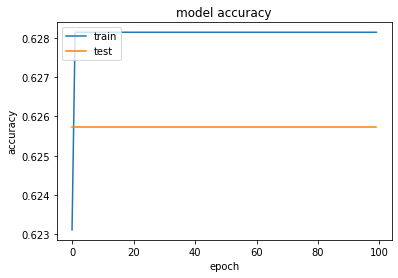

In [22]:
plt.plot(nn.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plotting loss

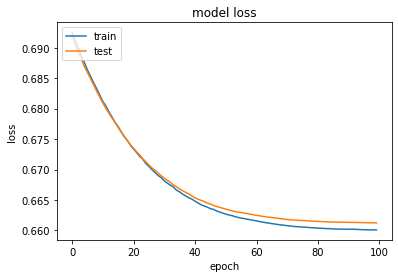

In [23]:
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predicting  using Neural Network

In [24]:
X_test[:1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
348,11.47,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,...,12.51,20.79,79.67,475.8,0.1531,0.112,0.09823,0.06548,0.2851,0.08763


In [25]:
## Make prediction
model.predict_classes(X_test[:1])

array([[1]], dtype=int32)

In [26]:
model.predict_proba(X_test[:1])

array([[0.62070435]], dtype=float32)

## Regression 

### Loading boston dataset 

In [27]:
from sklearn.datasets import load_boston

In [28]:
data = load_boston()

In [29]:
# Loading the data into a dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Defining X & y


In [30]:
X = df.drop(columns= ['MEDV'])
y = df["MEDV"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

X_test_ss = ss.transform(X_test)

In [32]:
X_train.shape[1]

13

## Building Model

In [33]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=X_train.shape[1] ))
model.add(Dense(50,activation ='relu'))
model.add(Dense(10,activation ='relu'))
model.add(Dense(1))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
# lr = learning rate
opt = Adam(lr=.1)

In [36]:
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

### Fitting model

In [37]:
%%time
nn = model.fit(X_train,
          y_train,
         validation_data = (X_test, y_test),
         batch_size=None,
         epochs = 100)

Train on 455 samples, validate on 51 samples
Epoch 1/100
455/455 [==============================] - 0s 371us/step - loss: 7083.6922 - accuracy: 0.0022 - val_loss: 401.1953 - val_accuracy: 0.0000e+00
Epoch 2/100
455/455 [==============================] - 0s 106us/step - loss: 185.5929 - accuracy: 0.0044 - val_loss: 94.5811 - val_accuracy: 0.0000e+00
Epoch 3/100
455/455 [==============================] - 0s 111us/step - loss: 119.4598 - accuracy: 0.0044 - val_loss: 87.5130 - val_accuracy: 0.0000e+00
Epoch 4/100
455/455 [==============================] - 0s 103us/step - loss: 143.1781 - accuracy: 0.0066 - val_loss: 90.1391 - val_accuracy: 0.0000e+00
Epoch 5/100
455/455 [==============================] - 0s 110us/step - loss: 91.8755 - accuracy: 0.0044 - val_loss: 76.6140 - val_accuracy: 0.0000e+00
Epoch 6/100
455/455 [==============================] - 0s 117us/step - loss: 84.9917 - accuracy: 0.0088 - val_loss: 78.7429 - val_accuracy: 0.0392
Epoch 7/100
455/455 [==========================

### Plotting Accuracy 

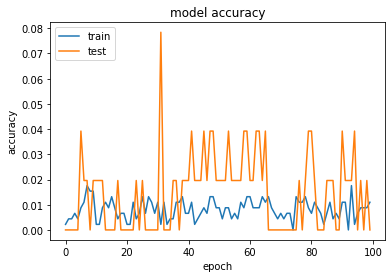

In [38]:
plt.plot(nn.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plotting loss

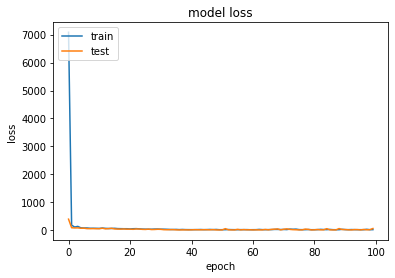

In [39]:
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predicting  using Neural Network

In [40]:
X_test[:1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
226,0.38214,0.0,6.2,0.0,0.504,8.04,86.5,3.2157,8.0,307.0,17.4,387.38,3.13


In [41]:
## Make prediction
model.predict_classes(X_test[:1])

array([[1]], dtype=int32)

In [42]:
model.predict_proba(X_test[:1])

array([[52.410374]], dtype=float32)

## Exercise : MultiClass Classification 

In [43]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [44]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names) 


In [45]:
X = dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
y = dataset[['Class']]

In [46]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [59]:
# check how many class

dataset['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Train Test Split 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,dummy_y, test_size=0.1, stratify= y)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

X_test_ss = ss.transform(X_test)

## Buiildng model 

In [61]:
X_train.shape[1]

4

In [64]:
# 3 layer NN

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=4 ))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [65]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
%%time
nn = model.fit(X_train,
          y_train,
         validation_data = (X_test, y_test),
         batch_size=None,
         epochs = 100)

Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 0s 966us/step - loss: 0.8482 - accuracy: 0.5852 - val_loss: 0.8522 - val_accuracy: 0.6444
Epoch 2/100
135/135 [==============================] - 0s 119us/step - loss: 0.8301 - accuracy: 0.6543 - val_loss: 0.8343 - val_accuracy: 0.6667
Epoch 3/100
135/135 [==============================] - 0s 153us/step - loss: 0.8122 - accuracy: 0.6667 - val_loss: 0.8176 - val_accuracy: 0.6667
Epoch 4/100
135/135 [==============================] - 0s 151us/step - loss: 0.7957 - accuracy: 0.6667 - val_loss: 0.8019 - val_accuracy: 0.6667
Epoch 5/100
135/135 [==============================] - 0s 167us/step - loss: 0.7784 - accuracy: 0.6642 - val_loss: 0.7863 - val_accuracy: 0.6667
Epoch 6/100
135/135 [==============================] - 0s 129us/step - loss: 0.7631 - accuracy: 0.6469 - val_loss: 0.7700 - val_accuracy: 0.6222
Epoch 7/100
135/135 [==============================] - 0s 150us/step - loss: 0.7467 -

### Plotting Accuracy 

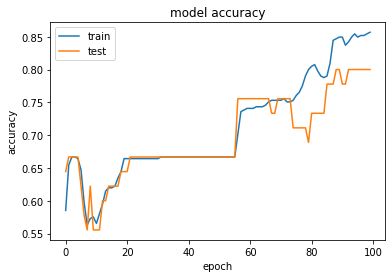

In [67]:
plt.plot(nn.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plotting loss

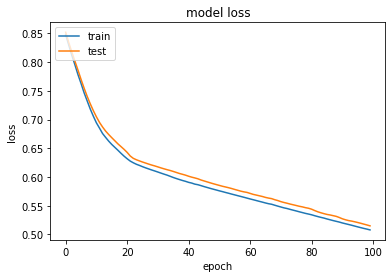

In [68]:
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predicting  using Neural Network

In [69]:
X_test[:1]

,sepal-length,sepal-width,petal-length,petal-width
140,6.7,3.1,5.6,2.4


In [70]:
X_test[:2]

,sepal-length,sepal-width,petal-length,petal-width
140,6.7,3.1,5.6,2.4
35,5.0,3.2,1.2,0.2


In [71]:
## Make prediction
model.predict_classes(X_test[:1])

array([1])

In [72]:
model.predict_proba(X_test[:1])

array([[0.03965127, 0.4718063 , 0.4148145 ]], dtype=float32)

### References
- [Keras video playlist DeepLizard (video playlist)](https://www.youtube.com/playlist?list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL)

- [TensorFlow or Keras? Which one should I learn? (article)](https://medium.com/implodinggradients/tensorflow-or-keras-which-one-should-i-learn-5dd7fa3f9ca0)

- [Keras Parameters Explanation (article)](https://medium.com/@zhang_yang/number-of-parameters-in-dense-and-convolutional-neural-networks-34b54c2ec349)

- [How to choose an optimizer (article)](https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/)
- [Optimizers - EXPLAINED! (video)](https://www.youtube.com/watch?v=mdKjMPmcWjY&ab_channel=CodeEmporium)